✅ Sample Dataset:
   Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0    Male     Yes          2      Graduate            No             1690   
1  Female      No         3+      Graduate            No            11992   
2    Male      No          2      Graduate           Yes            18864   
3    Male      No          0  Not Graduate           Yes             4475   
4    Male      No         3+  Not Graduate            No             7602   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0               1150         289               360             1.0   
1               7560         136               300             1.0   
2               1931         468               360             1.0   
3               9204         624               360             1.0   
4               1664         378               180             1.0   

  Property_Area Loan_Status  
0     Semiurban           N  
1     Semiurban           Y  
2     Se

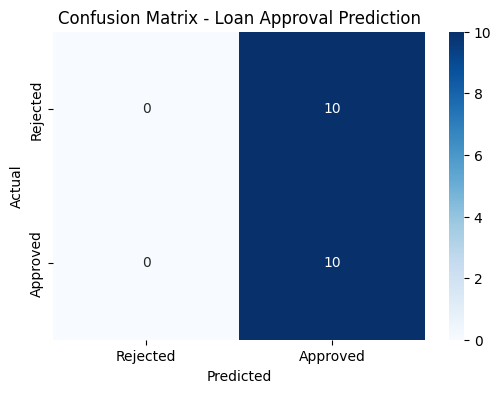


✅ Accuracy: 50.00%

📍 Sample Prediction: Approved ✅


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

np.random.seed(42)
data = {
    'Gender': np.random.choice(['Male', 'Female'], 100),
    'Married': np.random.choice(['Yes', 'No'], 100),
    'Dependents': np.random.choice(['0', '1', '2', '3+'], 100),
    'Education': np.random.choice(['Graduate', 'Not Graduate'], 100),
    'Self_Employed': np.random.choice(['Yes', 'No'], 100),
    'ApplicantIncome': np.random.randint(1500, 25000, 100),
    'CoapplicantIncome': np.random.randint(0, 10000, 100),
    'LoanAmount': np.random.randint(100, 700, 100),
    'Loan_Amount_Term': np.random.choice([360, 120, 180, 300], 100),
    'Credit_History': np.random.choice([1.0, 0.0], 100, p=[0.85, 0.15]),
    'Property_Area': np.random.choice(['Urban', 'Rural', 'Semiurban'], 100),
    'Loan_Status': np.random.choice(['Y', 'N'], 100, p=[0.7, 0.3])
}

df = pd.DataFrame(data)


print("Dataset:")
print(df.head())


le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Loan Approval Prediction")
plt.show()

acc = accuracy_score(y_test, y_pred)
print(f"\n Accuracy: {acc*100:.2f}%")

sample = np.array([[1, 1, 1, 0, 0, 6000, 0, 250, 360, 1.0, 2]])
sample_pred = model.predict(sample)[0]
status = "Approved ✅" if sample_pred == 1 else "Rejected ❌"
print(f"\n📍 Sample Prediction: {status}")


In [6]:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'bootstrap': [True, False]
}

# Random Forest base model
rf = RandomForestClassifier(random_state=42)

# Randomized Search with 20 iterations, 5-fold CV
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_dist,
                                   n_iter=20,
                                   cv=5,
                                   scoring='accuracy',
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=-1)

# Fit to training data
random_search.fit(X_train, y_train)

# Get best model
best_rf = random_search.best_estimator_

# Best hyperparameters
print("\n🎯 Best Parameters from RandomizedSearchCV:")
print(random_search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits

🎯 Best Parameters from RandomizedSearchCV:
{'bootstrap': False, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 289}



✅ Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.10      0.18        10
           1       0.53      1.00      0.69        10

    accuracy                           0.55        20
   macro avg       0.76      0.55      0.44        20
weighted avg       0.76      0.55      0.44        20


✅ Confusion Matrix:


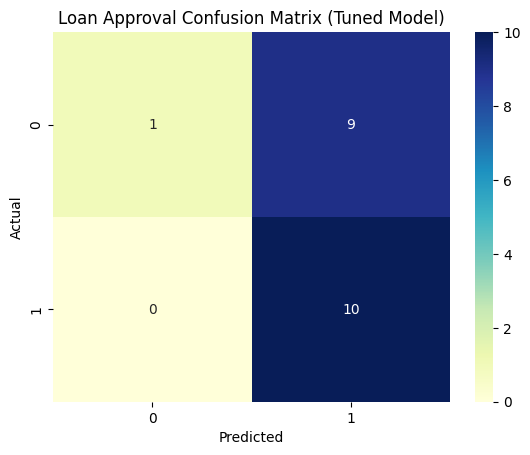


✅ Accuracy Score: 55.00%


In [7]:
# ----------------------------
# ✅ STEP 7: Evaluate Tuned Model
# ----------------------------
y_pred = best_rf.predict(X_test)

print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))

print("\n✅ Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Loan Approval Confusion Matrix (Tuned Model)")
plt.show()

print("\n✅ Accuracy Score: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))


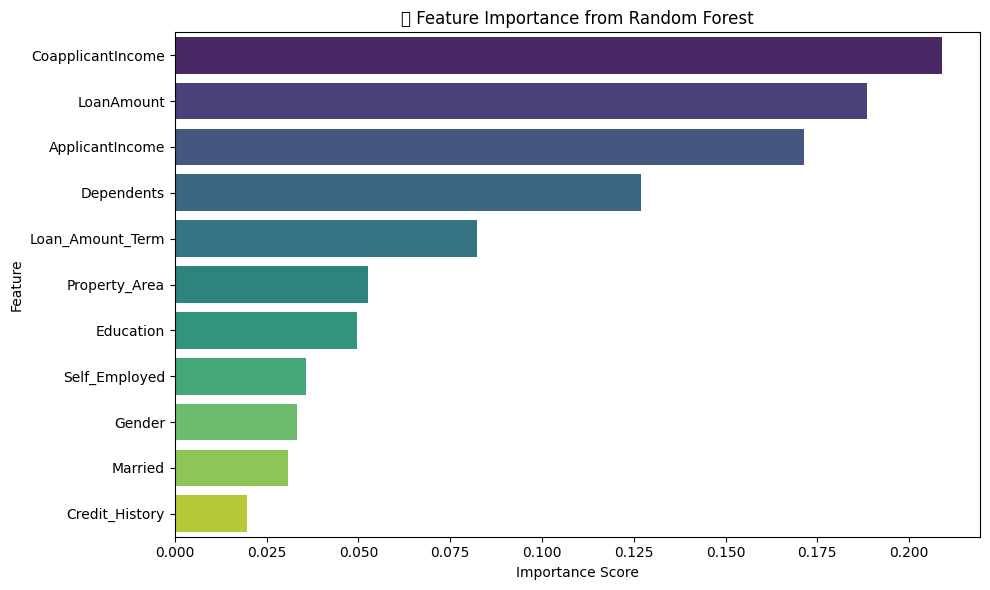

In [8]:

importances = best_rf.feature_importances_
features = X.columns

# Create a DataFrame for plotting
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('🔍 Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
